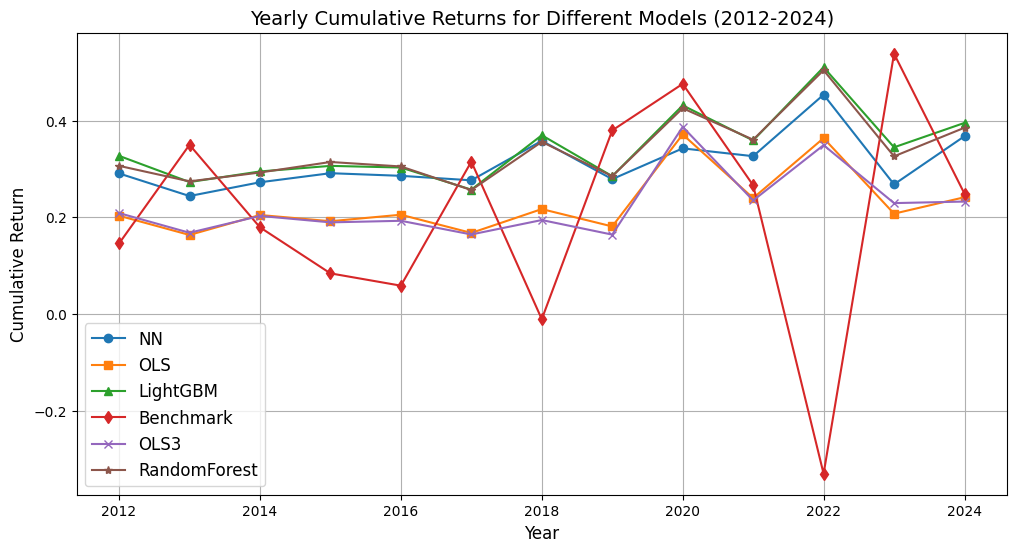


Portfolio Values:
     Year  NN Portfolio Value  OLS Portfolio Value  LightGBM Portfolio Value  \
0   2012        1.290706e+06         1.203330e+06              1.327055e+06   
1   2013        1.244040e+06         1.163621e+06              1.272905e+06   
2   2014        1.272463e+06         1.204827e+06              1.294807e+06   
3   2015        1.291217e+06         1.192000e+06              1.306334e+06   
4   2016        1.285780e+06         1.205395e+06              1.302949e+06   
5   2017        1.276504e+06         1.167803e+06              1.257230e+06   
6   2018        1.358136e+06         1.217077e+06              1.369650e+06   
7   2019        1.278933e+06         1.181211e+06              1.285070e+06   
8   2020        1.342505e+06         1.371305e+06              1.431296e+06   
9   2021        1.326364e+06         1.239783e+06              1.358868e+06   
10  2022        1.453425e+06         1.363640e+06              1.510101e+06   
11  2023        1.268104e+06    

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load all data frames
nn_portfolio = pd.read_csv('NN_portfolio_performance.csv')
ols_portfolio = pd.read_csv('OLS_portfolio_performance.csv')
lightgbm_portfolio = pd.read_csv('LightGBM_portfolio_performance_monthly.csv')
benchmark_portfolio = pd.read_csv('benchmark_portfolio_performance.csv')
ols3_portfolio = pd.read_csv('OLS3_portfolio_performance.csv')
randomforest_portfolio = pd.read_csv('RandomForest_portfolio_performance_monthly.csv')

# Combine all data frames on the column 'Year'
combined_df = nn_portfolio.merge(ols_portfolio, on='Year', suffixes=('_NN', '_OLS'))
combined_df = combined_df.merge(lightgbm_portfolio, on='Year', suffixes=('', '_LightGBM'))
combined_df = combined_df.merge(benchmark_portfolio, on='Year', suffixes=('', '_Benchmark'))
combined_df = combined_df.merge(ols3_portfolio, on='Year', suffixes=('', '_OLS3'))
combined_df = combined_df.merge(randomforest_portfolio, on='Year', suffixes=('', '_RandomForest'))

# Plot cumulative returns for all models
plt.figure(figsize=(12, 6))

# Plot each model's cumulative returns
plt.plot(combined_df['Year'], combined_df['Yearly Cumulative Return_NN'], label='NN', marker='o')
plt.plot(combined_df['Year'], combined_df['Yearly Cumulative Return_OLS'], label='OLS', marker='s')
plt.plot(combined_df['Year'], combined_df['Yearly Cumulative Return'], label='LightGBM', marker='^')
plt.plot(combined_df['Year'], combined_df['Yearly Cumulative Return_Benchmark'], label='Benchmark', marker='d')
plt.plot(combined_df['Year'], combined_df['Yearly Cumulative Return_OLS3'], label='OLS3', marker='x')
plt.plot(combined_df['Year'], combined_df['Yearly Cumulative Return_RandomForest'], label='RandomForest', marker='*')

# Add labels, title, and legend
plt.title('Yearly Cumulative Returns for Different Models (2012-2024)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Cumulative Return', fontsize=12)
plt.grid(True)
plt.legend(fontsize=12)

# Show the plot
plt.show()

# Calculate portfolio values for $1 million based on cumulative returns
initial_portfolio_value = 1_000_000

# Create a new DataFrame to store portfolio values
portfolio_values = combined_df[['Year']].copy()
portfolio_values['NN Portfolio Value'] = initial_portfolio_value * (1 + combined_df['Yearly Cumulative Return_NN'])
portfolio_values['OLS Portfolio Value'] = initial_portfolio_value * (1 + combined_df['Yearly Cumulative Return_OLS'])
portfolio_values['LightGBM Portfolio Value'] = initial_portfolio_value * (1 + combined_df['Yearly Cumulative Return'])
portfolio_values['Benchmark Portfolio Value'] = initial_portfolio_value * (1 + combined_df['Yearly Cumulative Return_Benchmark'])
portfolio_values['OLS3 Portfolio Value'] = initial_portfolio_value * (1 + combined_df['Yearly Cumulative Return_OLS3'])
portfolio_values['RandomForest Portfolio Value'] = initial_portfolio_value * (1 + combined_df['Yearly Cumulative Return_RandomForest'])

# Display the portfolio values
print("\nPortfolio Values:\n", portfolio_values)

In [2]:
combined_df

,Year,Yearly Cumulative Return_NN,Sharpe Ratio_NN,Yearly Cumulative Return_OLS,Sharpe Ratio_OLS,Yearly Cumulative Return,Sharpe Ratio,Unnamed: 0,Yearly Cumulative Return_Benchmark,Sharpe Ratio_Benchmark,Yearly Cumulative Return_OLS3,Sharpe Ratio_OLS3,Yearly Cumulative Return_RandomForest,Sharpe Ratio_RandomForest
0,2012,0.290706,3.269669,0.203330,2.383397,0.327055,3.812490,0,0.145984,0.973403,0.208783,2.480749,0.306386,3.494656
1,2013,0.244040,3.251733,0.163621,2.704087,0.272905,4.236837,1,0.349902,3.656941,0.168121,3.055951,0.274312,3.895207
2,2014,0.272463,2.715903,0.204827,3.269114,0.294807,3.340491,2,0.179366,1.666991,0.202954,3.194112,0.292652,3.443378
3,2015,0.291217,3.240343,0.192000,2.810225,0.306334,3.338170,3,0.084270,0.553275,0.189631,2.773344,0.314364,3.423182
4,2016,0.285780,3.052419,0.205395,2.228517,0.302949,3.673333,4,0.058858,0.467998,0.192880,2.375915,0.305137,3.534987
5,2017,0.276504,4.939622,0.167803,4.056358,0.257230,5.194455,5,0.315157,3.618870,0.164631,3.891067,0.256438,4.867241
6,2018,0.358136,4.289776,0.217077,2.717349,0.369650,4.479319,6,-0.010390,0.025731,0.194426,3.338342,0.355998,5.169294
7,2019,0.278933,2.992514,0.181211,2.728065,0.285070,2.935703,7,0.379640,2.128997,0.164332,2.619153,0.285077,3.313221
8,2020,0.342505,1.074746,0.371305,1.564023,0.431296,1.812803,8,0.475802,1.630990,0.386886,1.728708,0.425449,1.571027
9,2021,0.326364,3.647547,0.239783,3.605816,0.358868,4.174240,9,0.266273,1.904235,0.234904,3.321969,0.360479,3.969839


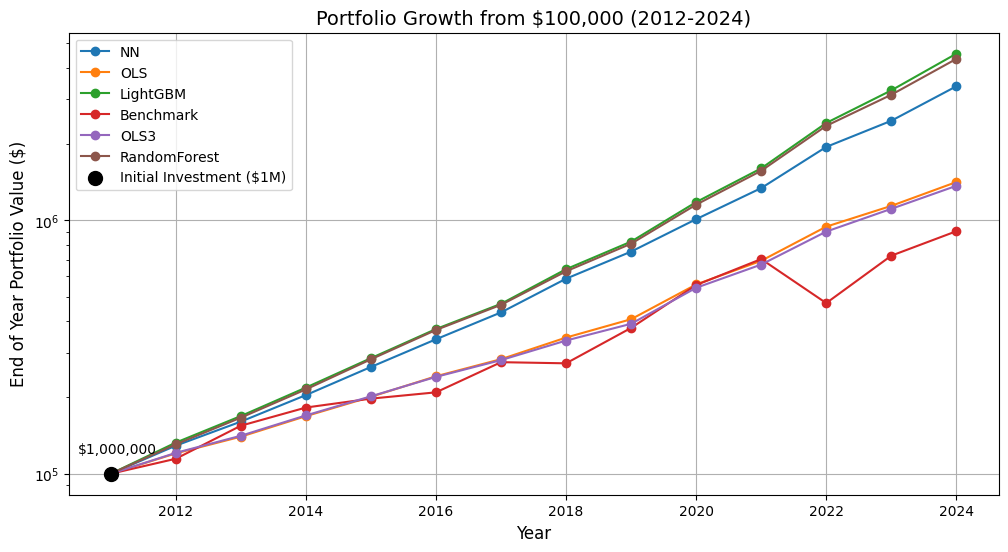


Final Portfolio Values at the End of 2024:

              Final Value (2024)
LightGBM            4.539179e+06
RandomForest        4.330079e+06
NN                  3.375929e+06
OLS                 1.414520e+06
OLS3                1.367077e+06
Benchmark           9.049326e+05


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load all data frames
models = {
    'NN': pd.read_csv('NN_portfolio_performance.csv'),
    'OLS': pd.read_csv('OLS_portfolio_performance.csv'),
    'LightGBM': pd.read_csv('LightGBM_portfolio_performance_monthly.csv'),
    'Benchmark': pd.read_csv('benchmark_portfolio_performance.csv'),
    'OLS3': pd.read_csv('OLS3_portfolio_performance.csv'),
    'RandomForest': pd.read_csv('RandomForest_portfolio_performance_monthly.csv')
}

# Initialize portfolio tracking
initial_investment = 1_000_00
portfolio_values = pd.DataFrame()

for model_name, df in models.items():
    # Add initial $1M at end of 2011
    initial_row = pd.DataFrame({'Year': [2011], 
                                'Yearly Cumulative Return': [0], 
                                'Portfolio Value': [initial_investment]})
    
    # Sort by year and calculate cumulative growth
    df = df.sort_values('Year')
    df['Portfolio Value'] = initial_investment * (1 + df['Yearly Cumulative Return']).cumprod()
    
    # Combine initial value with yearly returns
    full_df = pd.concat([initial_row, df]).reset_index(drop=True)
    
    # Add to portfolio_values DataFrame
    portfolio_values = pd.concat([
        portfolio_values,
        full_df[['Year', 'Portfolio Value']].rename(columns={'Portfolio Value': model_name})
    ], axis=1)

# Remove duplicate Year columns
portfolio_values = portfolio_values.loc[:, ~portfolio_values.columns.duplicated()]

# Plot portfolio growth with clear starting point
plt.figure(figsize=(12, 6))
for model in models.keys():
    plt.plot(portfolio_values['Year'], portfolio_values[model], 
             label=model, marker='o')

# Explicitly mark initial investment 
plt.scatter(2011, initial_investment, color='black', s=100, 
           label='Initial Investment ($1M)', zorder=10)
plt.annotate('$1,000,000', (2010.5, initial_investment * 1.2), 
            fontsize=10)

plt.title('Portfolio Growth from $100,000 (2012-2024)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('End of Year Portfolio Value ($)', fontsize=12)
plt.yscale('log')  # Log scale for better visualization of growth differences
plt.grid(True)
plt.legend(fontsize=10)
plt.show()

# Show final 2024 values
final_values_2024 = portfolio_values[portfolio_values['Year'] == 2024].drop('Year', axis=1).T
final_values_2024.columns = ['Final Value (2024)']
print("\nFinal Portfolio Values at the End of 2024:\n")
print(final_values_2024.sort_values('Final Value (2024)', ascending=False))

In [3]:
import pandas as pd

models = {
    'LightGBM': 'LightGBM_portfolio_performance_monthly.csv',
    'RandomForest': 'RandomForest_portfolio_performance_monthly.csv',
    'NN': 'NN_portfolio_performance.csv',
    'OLS': 'OLS_portfolio_performance.csv',
    'OLS3': 'OLS3_portfolio_performance.csv',
    'Benchmark': 'benchmark_portfolio_performance.csv'
}

sharpe_results = []

for model_name, file_path in models.items():
    df = pd.read_csv(file_path)
    if 'Sharpe Ratio' in df.columns:
        overall_sharpe = df['Sharpe Ratio'].mean()
        sharpe_results.append({'Model': model_name, 'Overall Sharpe Ratio': overall_sharpe})

consolidated_table = pd.DataFrame(sharpe_results)
print(consolidated_table.round(4))

          Model  Overall Sharpe Ratio
0      LightGBM                3.5949
1  RandomForest                3.5252
2            NN                3.1548
3           OLS                2.9853
4          OLS3                2.9174
5     Benchmark                1.5141
